## Simulação de rede QKD na topologia de rede da China

In [1]:
# Dependências
from components import Network, Controller
from components.qkd.app import *
import numpy as np

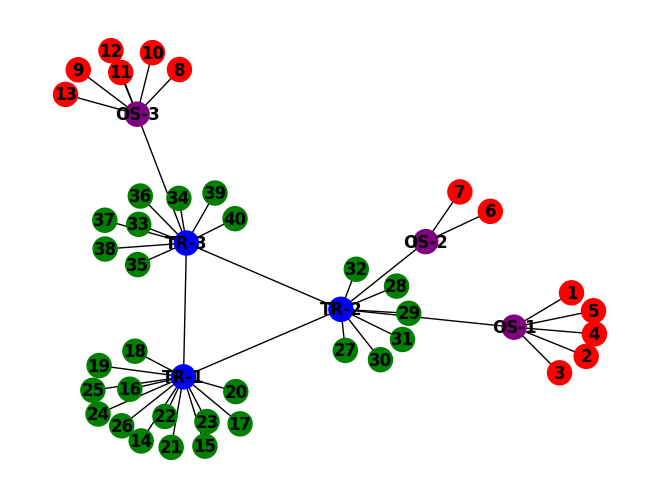

In [2]:
# Definindo rede e controlador
rede = Network()
rede.set_china_topology()
controlador = Controller(rede)
rede.newDraw()

In [3]:
# Exemplo de uso
n_simulacoes = 20
n_requests = 300
apps = ["BB84", "E91", "B92"]
routes_calculation_type = 'kshortest'
caso = 3

In [4]:
# Calculando e coletando resultados
vazao, taxa = run_simulations(rede, controlador, n_simulacoes, n_requests, apps, caso, routes_calculation_type)
media_sucesso = np.mean(taxa)
desvio_padrao_sucesso = np.std(taxa)
media_vazao = np.mean(vazao)
desvio_padrao_vazao = np.std(vazao)

Simulação:  0
Requests:  ['BB84: 27-37 (P:5 Key: 256)', 'BB84: 19-30 (P:4 Key: 12000)', 'B92: 31-35 (P:3 Key: 3000)', 'BB84: 1-9 (P:4 Key: 256)', 'BB84: 19-10 (P:4 Key: 3000)', 'B92: 7-OS-3 (P:3 Key: 256)', 'BB84: 17-37 (P:1 Key: 12000)', 'B92: 31-12 (P:3 Key: 8000)', 'E91: 15-32 (P:1 Key: 8000)', 'B92: 15-1 (P:3 Key: 256)', 'B92: 37-16 (P:3 Key: 12000)', 'E91: 10-3 (P:1 Key: 256)', 'BB84: 16-6 (P:2 Key: 8000)', 'BB84: 32-26 (P:3 Key: 3000)', 'B92: 3-18 (P:3 Key: 12000)', 'BB84: 5-6 (P:5 Key: 256)', 'BB84: 15-10 (P:3 Key: 12000)', 'BB84: 25-36 (P:4 Key: 8000)', 'B92: 9-19 (P:2 Key: 12000)', 'E91: 1-14 (P:4 Key: 8000)', 'B92: 2-38 (P:3 Key: 12000)', 'E91: 38-12 (P:2 Key: 12000)', 'E91: 36-20 (P:2 Key: 12000)', 'B92: 22-6 (P:4 Key: 12000)', 'BB84: 10-21 (P:1 Key: 12000)', 'B92: 27-30 (P:1 Key: 12000)', 'B92: 38-8 (P:1 Key: 8000)', 'BB84: 31-19 (P:5 Key: 12000)', 'B92: 26-23 (P:2 Key: 3000)', 'E91: 31-19 (P:4 Key: 8000)', 'E91: 19-38 (P:2 Key: 8000)', 'BB84: 14-15 (P:3 Key: 256)', 'E91: 3

In [5]:
print(formatar_numero(media_vazao),
formatar_numero(desvio_padrao_vazao),
formatar_numero(media_sucesso),
formatar_numero(desvio_padrao_sucesso))

0,1304181 0,0169413 0,3502763 0,0138377


In [6]:
# Formatação para Google Sheets
print(f'=SPLIT("{formatar_numero(media_vazao)} {formatar_numero(desvio_padrao_vazao)} {formatar_numero(media_sucesso)} {formatar_numero(desvio_padrao_sucesso)}"; " ")')

def formatar_planilha():
    apps = ["BB84", "E91", "B92"]
    routes_calculation_type = 'kshortest'
    numero_requests = [10, 25, 100]
    
    for request in numero_requests:
        taxas_sucesso_chaves_geral, vazao = run_simulations(rede, controlador, n_simulacoes, request, apps, caso, routes_calculation_type)
        media_sucesso = np.mean(taxas_sucesso_chaves_geral)
        desvio_padrao_sucesso = np.std(taxas_sucesso_chaves_geral)
        media_vazao = np.mean(vazao)
        desvio_padrao_vazao = np.std(vazao)
        #print(f'Numero de request atual: {request}')
        print("")
        print(f'=SPLIT("{formatar_numero(media_vazao)} {formatar_numero(desvio_padrao_vazao)} {formatar_numero(media_sucesso)} {formatar_numero(desvio_padrao_sucesso)}"; " ")')

=SPLIT("0,1304181 0,0169413 0,3502763 0,0138377"; " ")


In [7]:
# formatar_planilha()